In [1]:
import requests
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import graphing

import plotly.express as px

# import plotly.io as pio
# pio.renderers.default = "png" 
import plotly.graph_objects as go


from datetime import datetime

from mpl_toolkits import mplot3d

import statsmodels.formula.api as smf
import missingno as msno

# Exercise: Titanic Dataset - Visualising Different Types of Data

To build better machine learning models, we should understand the available data. This usually involves:

1. Data visualization.

2. Understanding the kind of data we have available.

In this module, we'll practice cleaning our Titanic dataset. We'll also practice visualization of different kinds of data like the following:

- Continuous
- Ordinal
- Categorical
- Simple identity column

## A Note On Our Graphing

This exercise uses a custom python script to create our graphs. This script uses Plotly, a well-known graphing library. 

This script will focus on data exploration, instead of a deep focus on Plotly. To review this custom script, you can find it in our GitHub repository.

## First Inspection

Let's reload the Titanic Dataset, and reacquaint ourselves with its data:


In [2]:
# Load data from our dataset file into a pandas dataframe
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
dataset = pd.read_csv('titanic.csv', index_col=False, sep=",", header=0)

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
px.histogram(dataset, x='Pclass', y='Survived', marginal='box', histfunc='avg', color='Parch',
             ) 


In [5]:
px.histogram(dataset, x='Pclass', y='Survived', histfunc='avg', barmode='group', color='Parch',
             title='Survival Rate by Passenger Class and Number of Parents/Children',
             labels={
        'Pclass': 'Passenger Class',
        'Survived': 'Survival Rate',
        'Parch': 'Number of Parents/Children'
                    }
             ) 


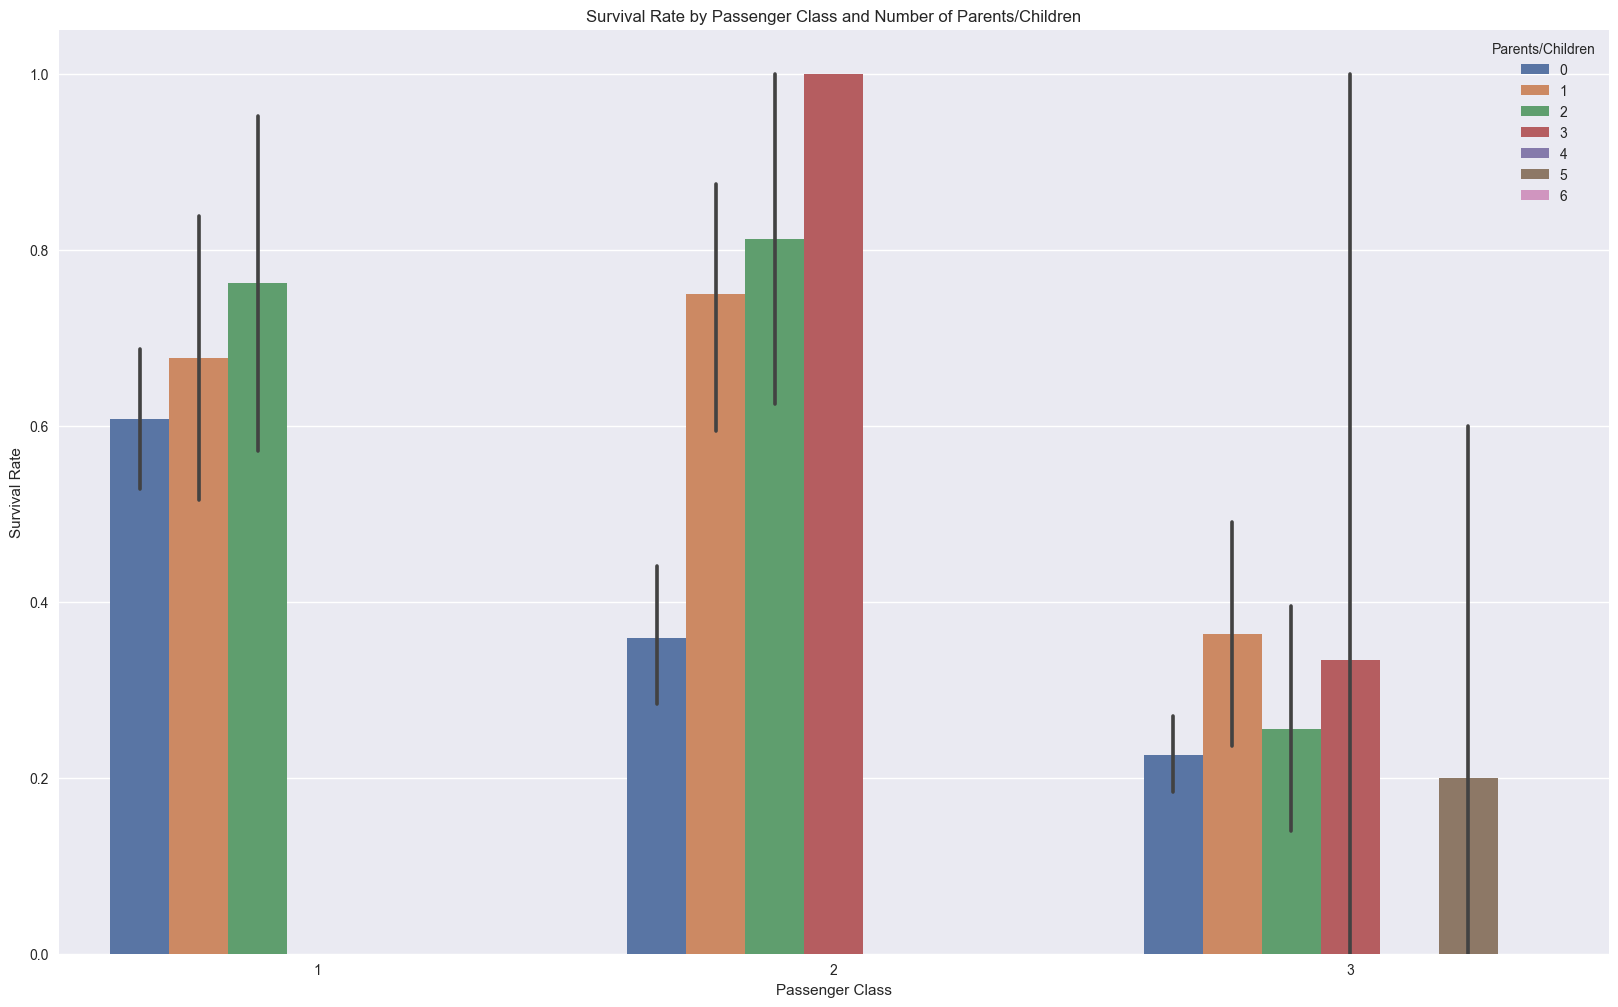

In [37]:

# survival_rates = dataset.groupby(['Pclass', 'Parch'])['Survived'].mean().reset_index()

plt.style.use('seaborn-v0_8')
fig, axs = plt.subplot_mosaic(
    [
    ['1'],
    # ['2'],
    ],
    figsize = (20,12))

axs['1'].set_title('Survival Rate by Passenger Class and Number of Parents/Children')
axs['1'].set_xlabel('Passenger Class')
axs['1'].set_ylabel('Survival Rate')
sns.barplot(data=dataset, 
           x='Pclass', 
           y='Survived',
           hue='Parch',
           palette='deep',
           ax=axs['1'])

axs['1'].legend(title='Parents/Children')






In [40]:

px.box(dataset, x="Pclass", y="SibSp")

In [48]:
px.scatter_3d(dataset, x="Age", y="Fare", z="Parch", color="Survived")

In [51]:
# Plot Fare vs Survival
graphing.histogram(dataset, label_x="Fare", label_y="Survived", histfunc="avg", nbins=30, title="Fare vs Survival", include_boxplot=True)

# Plot Age vs Survival
graphing.histogram(dataset, label_x="Age", label_y="Survived", histfunc="avg", title="Age vs Survival", nbins=30, include_boxplot=True)


In [ ]:
# # Create some simple functions
# # Read their descriptions to find out more 
# def get_rows(sex, port):
#     '''Returns rows that match in terms of sex and embarkment port'''
#     return dataset[(dataset["Embarked"] == port) & (dataset["Sex"] == sex)]

# def proportion_survived(sex, port):
#     '''Returns the proportion of people meeting criteria who survived'''
#     survived = get_rows(sex, port)["Survived"]
#     return np.mean(survived)

# # Make two columns of data - together these represent each combination
# # of sex and embarkment port
# sexes = ["male", "male", "male", "female","female", "female"]
# ports = ["C", "Q", "S", "C", "Q", "S" ] 

# # Calculate the number of passengers at each port + sex combination
# passenger_count = [len(get_rows(sex, port)) for sex,port in zip(sexes, ports)]

# # Calculate the proportion of passengers from each port + sex combination who survived
# passenger_survival = [proportion_survived(sex, port) for sex,port in zip(sexes, ports)]

# # Combine into a single data frame
# table = pd.DataFrame(dict(
#     sex=sexes,
#     port=ports,
#     passenger_count=passenger_count,
#     passenger_survival_rate=passenger_survival
# ))


# Simple approach using groupby
table = dataset.groupby(['Sex', 'Embarked']).agg({
    'Survived': ['mean', 'count']
}).reset_index()

# Clean up the column names
table.columns = ['sex', 'port', 'passenger_survival_rate', 'passenger_count']

# Make a bubble plot
# This is just a scatter plot but each entry in the plot 
# has a size and colour. We set colour to passenger_survival 
# and size to the number of passengers 
graphing.scatter_2D(table, 
                    label_colour="passenger_survival_rate", 
                    label_size="passenger_count", 
                    size_multiplier=0.3,
                    title="Bubble Plot of Categorical Data")